# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn import datasets
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

import warnings
warnings.filterwarnings("ignore")
# from sklearn import datasets
# from keras.datasets import 

# Implementation of neural network without using libraries

In [13]:
def init_param():
    """
    Two hidden layer and each layer is having 3 nodes and one output layer which is binary
    
    """
    # Hidden layer 1 and bias layer 1 weights
    W1 = 2 * np.random.randn(4, 3) - 0.5
    b1 = 2 * np.random.randn(1, 3) - 0.5
    
    # Hidden layer 2 and bias layer 2 weights
#     W2 = np.random.randn(3, 3)
#     b2 = np.random.randn(3, 1)
    
    # Second layer and bias at output weights
    W2 = 2 * np.random.randn(3, 3) - 0.5
    b2 = 2 * np.random.randn(1, 3) - 0.5
    
    # output layer and bias at output weights
    W3 = 2 * np.random.randn(3, 1) - 0.5
    b3 = 2 * np.random.randn(1, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3

In [14]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

def softmax_derivative(A, Z):
    return A - Z

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

def ReLU_deriv(Z):
    return Z > 0

In [15]:
# def loss_fun(y_act,y_pred):
#     ### BEGIN SOLUTION
#     loss=np.sum(-y_act*np.log(y_pred)- (1-y_act)*np.log(1-y_pred))
#     return loss

In [16]:
def ada_act(X, K0, K1):
    
    return K0 + K1 * X


def ada_act_deriv(Z, K0, K1):
    """
    Ada activation function is linear in relation so derivative of the linear equation is solpe
    
    """
    result = ada_act(Z, K0, K1)
    return K1
    

In [17]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    """
    feed forward network: predict the values based on the input and hidden layer
    2 hidden layer and each layer is having 3 nodes and one output layer
    
    Generalised equation: Z = X.dot(W) + b
                          A = activation(Z)
                          
    Z = summation linear combination of weighted matrix and Input + bias for each node
    A = Aapply activation on Z 
    
    """
# Firts layer
    Z1 = X.dot(W1) + b1
    K0 = np.random.uniform(0, 1, Z1.shape)
    K1 = np.random.uniform(0, 1, Z1.shape)
    A1 = ada_act(Z1, K0, K1)
    derivZ1 = ada_act_deriv(Z1, K0, K1)

    # second layer
    Z2 = A1.dot(W2) + b2
    K0 = np.random.uniform(0, 1, Z2.shape)
    K1 = np.random.uniform(0, 1, Z2.shape)
    A2 = ada_act(Z2, K0, K1)
    derivZ2 = ada_act_deriv(Z2, K0, K1)
    
    
    Z3 = A2.dot(W3) + b3
    A3 = sigmoid(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3, derivZ1, derivZ2

In [18]:
def back_propagation(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, derivZ1, derivZ2, X, Y):
    """
    Prediction results error:
    Minimise the error by updation weight matrix through backpropagation 
    """
    m = Y.size
    error_by_model = A3 - Y
    dZ3 = error_by_model # sigmoid_derivative(A3) * error_by_model # derivatives of error or loss function for softmax equation
    # print(dZ3.shape, 'dz3')
    dW3 = 1/m * A2.T.dot(dZ3)
    # print(dW3.shape, 'dw3')
    db3 = 1/m * np.mean(dZ3, axis=0)
    # print(db3.shape, 'db3')

    dA2 = dZ3.dot(W3.T)
    dZ2 = derivZ2 * dA2
    # print(dZ2.shape, 'dz2')
    dW2 = 1 / m * A1.T.dot(dZ2)
    # print(dW2.shape, 'dw2')
    db2 = 1/m * np.mean(dZ2.shape, axis=0)
    # print(db2.shape, 'db2')

    dK2 = [[np.mean(dA2)],
          [np.mean(dA2 * Z2)],
          [np.mean(dA2 * np.power(Z2, 2))]]

    dA1 = dZ2.dot(W2.T)
    dZ1 = derivZ1 * dA1
    # print(dZ1.shape, 'dz1')
    dW1 = 1 / m * X.T.dot(dZ1)
    # print(dW1.shape, 'dw1')
    db1 = 1/m * np.mean(dZ1, axis=0)
    # print(db1.shape, 'db1')

    dK1 = [[np.mean(dA1)],
          [np.mean(dA1 * Z1)], 
          [np.mean(dA1 * np.power(Z1, 2))]]

    dK = dK1 + dK2

    return dW1, db1, dW2, db2, dW3, db3, dZ3, dK

In [19]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, W3, b3, dW3, db3, alpha):
    """
    Update the weights based on learning rate/step size
    
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2  
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3
    
    return W1, b1, W2, b2, W3, b3

In [66]:
def gradient_descent(X, Y, alpha, iterations):
    np.random.seed(1234)
    error = []
    accuracy = []
    W1, b1, W2, b2, W3, b3 = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, derivZ1, derivZ2 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
        dW1, db1, dW2, db2, dW3, db3, dZ3, dK = back_propagation(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, derivZ1, derivZ2, X, Y)    
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, W3, b3, dW3, db3, alpha)
#         pred_prob = f1_score(Y, A3)
        error_by_model = Y - A3
        Average = np.mean(np.abs(error_by_model))
        Accuracy = 1 - Average
#         Accuracy = accuracy_score(Y, A3)
        if i % 10 == 0:
            print("Iteration: ", i)
            print('iteration: ' + str(i + 1) + ' Error: ' + str(Average) + "   " +"Accuracy:" + str(Accuracy))
            error.append(Average)
            accuracy.append(Accuracy)
    return error, accuracy

# Bank Data analysis

In [67]:
# Reading the file
df = pd.read_csv(r"bank_note_data.csv")

In [68]:
print(df.columns)
print(df.shape)
print(df["Class"].value_counts())
print(df.isna().sum())
print(df.describe())

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')
(1372, 5)
0    762
1    610
Name: Class, dtype: int64
Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64
         Image.Var   Image.Skew   Image.Curt      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


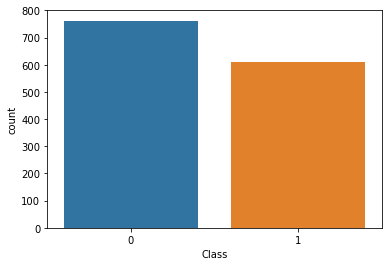

In [69]:
sns.countplot(df['Class'])
plt.show()

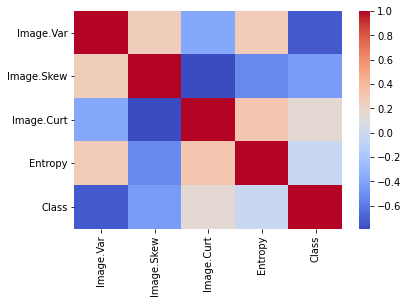

In [70]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()


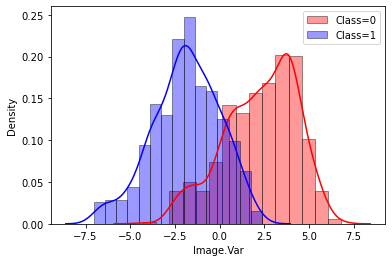

In [71]:
sns.distplot(df[df['Class']==0]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='red',label='Class=0')
sns.distplot(df[df['Class']==1]['Image.Var'],bins=15,hist_kws=dict(edgecolor='black'),color='blue',label='Class=1')
plt.legend()

<AxesSubplot:xlabel='Image.Curt', ylabel='Image.Skew'>

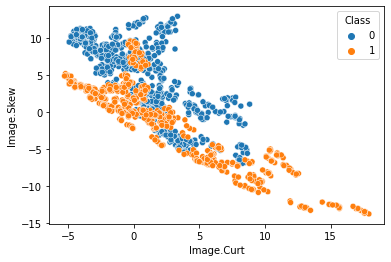

In [72]:
sns.scatterplot(x='Image.Curt',y='Image.Skew',data=df,hue='Class')

### Implementation on Bank-data analysis

In [73]:
# dropping y(target column)
X=df.drop('Class',axis=1).values
# targeting columns
y=df['Class'].values
# dividing the X, y into train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
# standerdization of attributes
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

(960, 4)
(412, 4)
(960,)
(412,)


In [74]:
# implementation on train and test data 
train_error, train_accuracy = gradient_descent(X_train, y_train, 0.3, 500)

Iteration:  0
iteration: 1 Error: 0.7919006388421849   Accuracy:0.20809936115781513
Iteration:  10
iteration: 11 Error: 0.32045694210051795   Accuracy:0.6795430578994821
Iteration:  20
iteration: 21 Error: 0.2645659969788781   Accuracy:0.7354340030211219
Iteration:  30
iteration: 31 Error: 0.2316062492032484   Accuracy:0.7683937507967515
Iteration:  40
iteration: 41 Error: 0.24290064784699147   Accuracy:0.7570993521530085
Iteration:  50
iteration: 51 Error: 0.2602723217559394   Accuracy:0.7397276782440606
Iteration:  60
iteration: 61 Error: 0.26445222414652   Accuracy:0.7355477758534801
Iteration:  70
iteration: 71 Error: 0.29164783804643973   Accuracy:0.7083521619535602
Iteration:  80
iteration: 81 Error: 0.2895489355773246   Accuracy:0.7104510644226754
Iteration:  90
iteration: 91 Error: 0.3040487822167515   Accuracy:0.6959512177832485
Iteration:  100
iteration: 101 Error: 0.2637577965062933   Accuracy:0.7362422034937067
Iteration:  110
iteration: 111 Error: 0.30001305324486677   Acc

In [79]:
test_error, test_accuracy = gradient_descent(X_test, y_test, 0.3, 500)

Iteration:  0
iteration: 1 Error: 0.7631599457086305   Accuracy:0.23684005429136945
Iteration:  10
iteration: 11 Error: 0.2950961146497182   Accuracy:0.7049038853502818
Iteration:  20
iteration: 21 Error: 0.23861317287616832   Accuracy:0.7613868271238317
Iteration:  30
iteration: 31 Error: 0.22943689585096425   Accuracy:0.7705631041490357
Iteration:  40
iteration: 41 Error: 0.2386137688658238   Accuracy:0.7613862311341761
Iteration:  50
iteration: 51 Error: 0.24559584308461238   Accuracy:0.7544041569153876
Iteration:  60
iteration: 61 Error: 0.2668325149880613   Accuracy:0.7331674850119387
Iteration:  70
iteration: 71 Error: 0.2722716857687211   Accuracy:0.7277283142312789
Iteration:  80
iteration: 81 Error: 0.31934964126555937   Accuracy:0.6806503587344406
Iteration:  90
iteration: 91 Error: 0.2915521150424379   Accuracy:0.7084478849575622
Iteration:  100
iteration: 101 Error: 0.30056847187706875   Accuracy:0.6994315281229313
Iteration:  110
iteration: 111 Error: 0.2711079383596977   

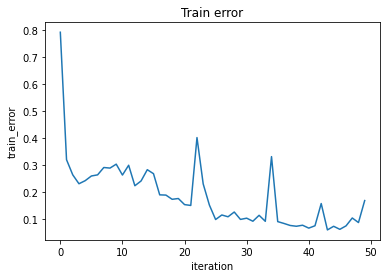

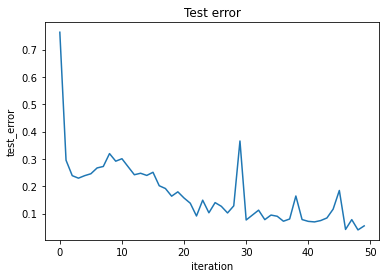

In [80]:
plt.title("Train error")
plt.xlabel("iteration")
plt.ylabel("train_error")
plt.plot(train_error)
plt.show()

plt.title("Test error")
plt.xlabel("iteration")
plt.ylabel("test_error")
plt.plot(test_error)
plt.show()

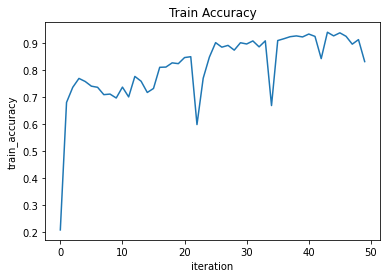

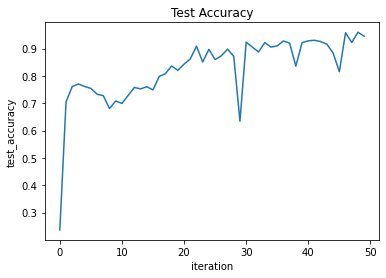

In [81]:
plt.title("Train Accuracy")
plt.xlabel("iteration")
plt.ylabel("train_accuracy")
plt.plot(train_accuracy)
plt.show()

plt.title("Test Accuracy")
plt.xlabel("iteration")
plt.ylabel("test_accuracy")
plt.plot(test_accuracy)
plt.show()



# Implemention of neural network on IRIES data sets

In [92]:
# from inbuilt data set iries dataset is loaded
iries_dataset = datasets.load_iris()
X = iries_dataset.data
y = iries_dataset.target
# seperate columns are created for the target variable
y = np_utils.to_categorical(y)

In [93]:
# splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
# standerdization of numeric attributes
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


In [95]:
# Depending upon shape of the datasets intialization is updated according to number of feature
def init_param():
    """
    Two hidden layer and each layer is having 3 nodes and one output layer which is binary
    
    """
    # Hidden layer 1 and bias layer 1 weights
    W1 = 2 * np.random.randn(4, 3) - 0.5
    b1 = 2 * np.random.randn(1, 3) - 0.5
    
    # Hidden layer 2 and bias layer 2 weights
#     W2 = np.random.randn(3, 3)
#     b2 = np.random.randn(3, 1)
    
    # Second layer and bias at output weights
    W2 = 2 * np.random.randn(3, 3) - 0.5
    b2 = 2 * np.random.randn(1, 3) - 0.5
    
    # output layer and bias at output weights
    W3 = 2 * np.random.randn(3, 3) - 0.5
    b3 = 2 * np.random.randn(1, 3) - 0.5
    
    return W1, b1, W2, b2, W3, b3

In [104]:
# implementation on train and test data 
train_error, train_accuracy = gradient_descent(X_train, y_train, 0.1, 1000)

Iteration:  0
iteration: 1 Error: 0.5953293118746095   Accuracy:0.40467068812539053
Iteration:  10
iteration: 11 Error: 0.44211570576132403   Accuracy:0.5578842942386759
Iteration:  20
iteration: 21 Error: 0.3638075426875614   Accuracy:0.6361924573124387
Iteration:  30
iteration: 31 Error: 0.3721388287104937   Accuracy:0.6278611712895064
Iteration:  40
iteration: 41 Error: 0.3424397922316458   Accuracy:0.6575602077683542
Iteration:  50
iteration: 51 Error: 0.34700773983335437   Accuracy:0.6529922601666456
Iteration:  60
iteration: 61 Error: 0.3448506941886603   Accuracy:0.6551493058113397
Iteration:  70
iteration: 71 Error: 0.3084742592366775   Accuracy:0.6915257407633225
Iteration:  80
iteration: 81 Error: 0.3196113622554063   Accuracy:0.6803886377445937
Iteration:  90
iteration: 91 Error: 0.3021893269342099   Accuracy:0.69781067306579
Iteration:  100
iteration: 101 Error: 0.31859254429974015   Accuracy:0.6814074557002598
Iteration:  110
iteration: 111 Error: 0.29855594975340566   Acc

In [105]:
test_error, test_accuracy = gradient_descent(X_test, y_test, 0.1, 1000)

Iteration:  0
iteration: 1 Error: 0.5991733674453843   Accuracy:0.4008266325546157
Iteration:  10
iteration: 11 Error: 0.5306244900199852   Accuracy:0.46937550998001476
Iteration:  20
iteration: 21 Error: 0.4409318241976791   Accuracy:0.5590681758023208
Iteration:  30
iteration: 31 Error: 0.411147937527614   Accuracy:0.588852062472386
Iteration:  40
iteration: 41 Error: 0.3988481129165378   Accuracy:0.6011518870834622
Iteration:  50
iteration: 51 Error: 0.3842176047092805   Accuracy:0.6157823952907195
Iteration:  60
iteration: 61 Error: 0.3999704972908251   Accuracy:0.6000295027091749
Iteration:  70
iteration: 71 Error: 0.40612998594175614   Accuracy:0.5938700140582438
Iteration:  80
iteration: 81 Error: 0.38289107245263443   Accuracy:0.6171089275473656
Iteration:  90
iteration: 91 Error: 0.363394955376572   Accuracy:0.6366050446234279
Iteration:  100
iteration: 101 Error: 0.40964308020706375   Accuracy:0.5903569197929363
Iteration:  110
iteration: 111 Error: 0.37636539584247986   Accu

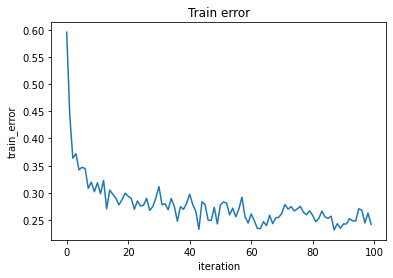

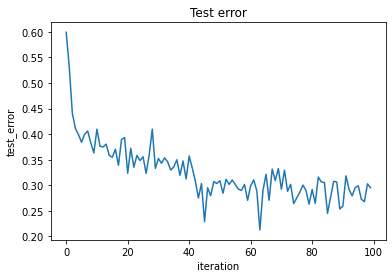

In [106]:
plt.title("Train error")
plt.xlabel("iteration")
plt.ylabel("train_error")
plt.plot(train_error)
plt.show()

plt.title("Test error")
plt.xlabel("iteration")
plt.ylabel("test_error")
plt.plot(test_error)
plt.show()

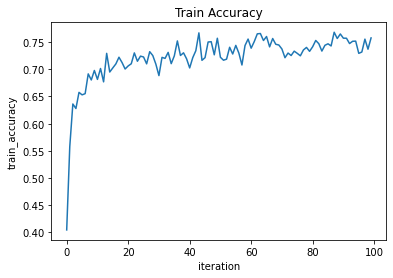

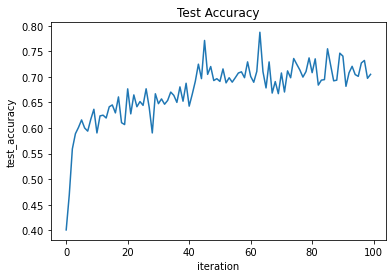

In [107]:
plt.title("Train Accuracy")
plt.xlabel("iteration")
plt.ylabel("train_accuracy")
plt.plot(train_accuracy)
plt.show()

plt.title("Test Accuracy")
plt.xlabel("iteration")
plt.ylabel("test_accuracy")
plt.plot(test_accuracy)
plt.show()



# Implemenation of neural network on breast cancer dataset

In [136]:
# loading the data from the standard libraries
breast_cancer = datasets.load_breast_cancer()
# diving independent and target attributes
X = breast_cancer.data
y = breast_cancer.target
y = np_utils.to_categorical(y)

In [148]:
# splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# standerdisation of numeric attributes
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

(398, 30)
(171, 30)
(398, 2)
(171, 2)


In [151]:
# initializaton of parameters based on cancer datasets attributes
def init_param():
    """
    Two hidden layer and each layer is having 3 nodes and one output layer which is binary
    
    """
    # Hidden layer 1 and bias layer 1 weights
    W1 = 2 * np.random.randn(30, 3) - 0.5
    b1 = 2 * np.random.randn(1, 3) - 0.5
    
    # Hidden layer 2 and bias layer 2 weights
#     W2 = np.random.randn(3, 3)
#     b2 = np.random.randn(3, 1)
    
    # Second layer and bias at output weights
    W2 = 2 * np.random.randn(3, 3) - 0.5
    b2 = 2 * np.random.randn(1, 3) - 0.5
    
    # output layer and bias at output weights
    W3 = 2 * np.random.randn(3, 2) - 0.5
    b3 = 2 * np.random.randn(1, 2) - 0.5
    
    return W1, b1, W2, b2, W3, b3

In [152]:
# implemenation of nural network on breast cancer data
train_error, train_accuracy = gradient_descent(X_train, y_train, 0.1, 1000)


Iteration:  0
iteration: 1 Error: 0.450448664167958   Accuracy:0.5495513358320421
Iteration:  10
iteration: 11 Error: 0.16071628576643981   Accuracy:0.8392837142335602
Iteration:  20
iteration: 21 Error: 0.189502499798894   Accuracy:0.810497500201106
Iteration:  30
iteration: 31 Error: 0.16711104723896433   Accuracy:0.8328889527610357
Iteration:  40
iteration: 41 Error: 0.16374943221461077   Accuracy:0.8362505677853892
Iteration:  50
iteration: 51 Error: 0.1634793399779182   Accuracy:0.8365206600220818
Iteration:  60
iteration: 61 Error: 0.1503172653730856   Accuracy:0.8496827346269145
Iteration:  70
iteration: 71 Error: 0.1476364103120294   Accuracy:0.8523635896879707
Iteration:  80
iteration: 81 Error: 0.15164583990774616   Accuracy:0.8483541600922538
Iteration:  90
iteration: 91 Error: 0.15665031302427565   Accuracy:0.8433496869757243
Iteration:  100
iteration: 101 Error: 0.1424775449759391   Accuracy:0.8575224550240609
Iteration:  110
iteration: 111 Error: 0.1367075282082571   Accu

In [154]:
test_error, test_accuracy = gradient_descent(X_test, y_test, 0.1, 1000)

Iteration:  0
iteration: 1 Error: 0.49236996148541123   Accuracy:0.5076300385145888
Iteration:  10
iteration: 11 Error: 0.2430472094879879   Accuracy:0.7569527905120121
Iteration:  20
iteration: 21 Error: 0.24904170204049436   Accuracy:0.7509582979595056
Iteration:  30
iteration: 31 Error: 0.23649257759696385   Accuracy:0.7635074224030362
Iteration:  40
iteration: 41 Error: 0.20827633826002698   Accuracy:0.791723661739973
Iteration:  50
iteration: 51 Error: 0.22220468419114753   Accuracy:0.7777953158088524
Iteration:  60
iteration: 61 Error: 0.22201649259555573   Accuracy:0.7779835074044443
Iteration:  70
iteration: 71 Error: 0.23993893192806048   Accuracy:0.7600610680719395
Iteration:  80
iteration: 81 Error: 0.2530544389529542   Accuracy:0.7469455610470458
Iteration:  90
iteration: 91 Error: 0.2243465537716763   Accuracy:0.7756534462283237
Iteration:  100
iteration: 101 Error: 0.22685990214078408   Accuracy:0.7731400978592159
Iteration:  110
iteration: 111 Error: 0.18744621772820108 

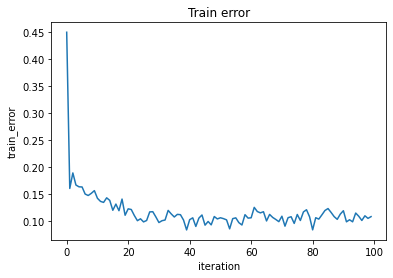

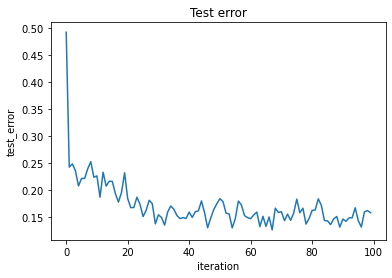

In [155]:
plt.title("Train error")
plt.xlabel("iteration")
plt.ylabel("train_error")
plt.plot(train_error)
plt.show()

plt.title("Test error")
plt.xlabel("iteration")
plt.ylabel("test_error")
plt.plot(test_error)
plt.show()

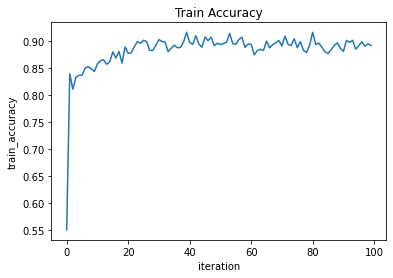

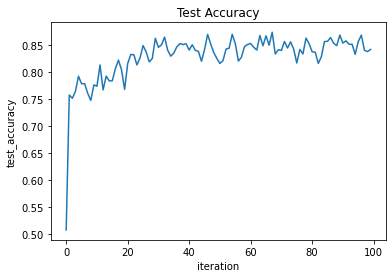

In [156]:
plt.title("Train Accuracy")
plt.xlabel("iteration")
plt.ylabel("train_accuracy")
plt.plot(train_accuracy)
plt.show()

plt.title("Test Accuracy")
plt.xlabel("iteration")
plt.ylabel("test_accuracy")
plt.plot(test_accuracy)
plt.show()



# Implemenation of nural network on MNIST datasets

In [207]:
# importing the datasets from keras libraries and divided the data into train and test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [208]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [209]:
# standerdisation of data 
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [210]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [211]:
# since image data is loaded it is in the form of 3d shape. It is then converted into 2d shape using dot product
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

In [212]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [213]:
# initialization of parameter depending upon the datasets attributes.
def init_param():
    """
    Two hidden layer and each layer is having 3 nodes and one output layer which is binary
    
    """
    # Hidden layer 1 and bias layer 1 weights
    W1 = 2 * np.random.randn(784, 3) - 0.5
    b1 = 2 * np.random.randn(1, 3) - 0.5
    
    # Hidden layer 2 and bias layer 2 weights
#     W2 = np.random.randn(3, 3)
#     b2 = np.random.randn(3, 1)
    
    # Second layer and bias at output weights
    W2 = 2 * np.random.randn(3, 3) - 0.5
    b2 = 2 * np.random.randn(1, 3) - 0.5
    
    # output layer and bias at output weights
    W3 = 2 * np.random.randn(3, 10) - 0.5
    b3 = 2 * np.random.randn(1, 10) - 0.5
    
    return W1, b1, W2, b2, W3, b3

In [214]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# training the nural network on train and test data
train_error, train_accuracy = gradient_descent(X_train, y_train, 0.01, 100)


Iteration:  0
iteration: 1 Error: 0.4188787091749005   Accuracy:0.5811212908250996
Iteration:  10
iteration: 11 Error: 0.33781499052660535   Accuracy:0.6621850094733946
Iteration:  20
iteration: 21 Error: 0.2567765155440234   Accuracy:0.7432234844559766
Iteration:  30
iteration: 31 Error: 0.22142559595661404   Accuracy:0.778574404043386
Iteration:  40
iteration: 41 Error: 0.208400339149667   Accuracy:0.7915996608503331
Iteration:  50
iteration: 51 Error: 0.20033310212719435   Accuracy:0.7996668978728056
Iteration:  60
iteration: 61 Error: 0.1950201385839228   Accuracy:0.8049798614160772
Iteration:  70
iteration: 71 Error: 0.19048586020732083   Accuracy:0.8095141397926792
Iteration:  80
iteration: 81 Error: 0.1875235293968765   Accuracy:0.8124764706031236
Iteration:  90
iteration: 91 Error: 0.18749469710801278   Accuracy:0.8125053028919872


In [215]:
test_error, test_accuracy = gradient_descent(X_test, y_test, 0.01, 100)

Iteration:  0
iteration: 1 Error: 0.41659849184905884   Accuracy:0.5834015081509412
Iteration:  10
iteration: 11 Error: 0.33415957258697915   Accuracy:0.6658404274130209
Iteration:  20
iteration: 21 Error: 0.2542169937293255   Accuracy:0.7457830062706745
Iteration:  30
iteration: 31 Error: 0.2179159495442492   Accuracy:0.7820840504557508
Iteration:  40
iteration: 41 Error: 0.20728150032210954   Accuracy:0.7927184996778904
Iteration:  50
iteration: 51 Error: 0.19751577390120983   Accuracy:0.8024842260987901
Iteration:  60
iteration: 61 Error: 0.1941383372378167   Accuracy:0.8058616627621833
Iteration:  70
iteration: 71 Error: 0.18938802829237864   Accuracy:0.8106119717076213
Iteration:  80
iteration: 81 Error: 0.1851435863105494   Accuracy:0.8148564136894506
Iteration:  90
iteration: 91 Error: 0.18708772594395193   Accuracy:0.812912274056048


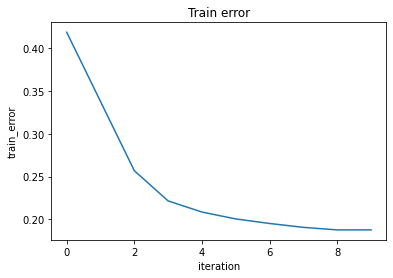

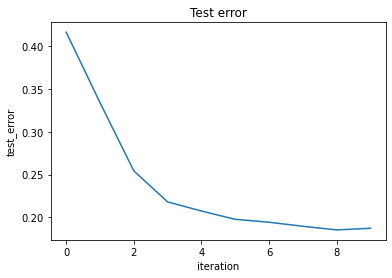

In [216]:
import matplotlib.pyplot as plt
# plt.scatter(iteration, train_error)
plt.title("Train error")
plt.xlabel("iteration")
plt.ylabel("train_error")
plt.plot(train_error)
plt.show()

plt.title("Test error")
plt.xlabel("iteration")
plt.ylabel("test_error")
plt.plot(test_error)
plt.show()

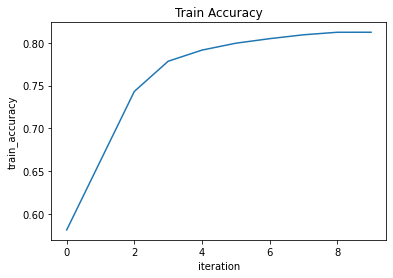

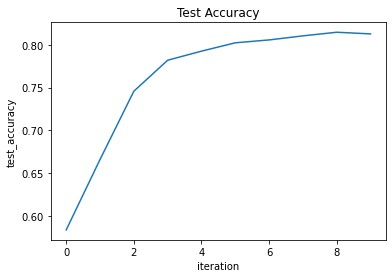

In [217]:
plt.title("Train Accuracy")
plt.xlabel("iteration")
plt.ylabel("train_accuracy")
plt.plot(train_accuracy)
plt.show()

plt.title("Test Accuracy")
plt.xlabel("iteration")
plt.ylabel("test_accuracy")
plt.plot(test_accuracy)
plt.show()

